In [2]:
import pandas as pd

In [3]:
df2 = pd.read_csv('work.csv')
df2

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


In [4]:
df2.head()

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94


In [5]:
df2.tail()

,Name,city,age,py-score
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      7 non-null      object
 1   city      7 non-null      object
 2   age       6 non-null      object
 3   py-score  6 non-null      object
dtypes: object(4)
memory usage: 356.0+ bytes


In [7]:
df2.dropna(inplace=True)

In [8]:
df2.fillna(0, inplace=True)

In [9]:
# Data cleaning
#Check null values
df2.isnull().sum().sort_values(ascending=False)

Name        0
city        0
age         0
py-score    0
dtype: int64

<Axes: >

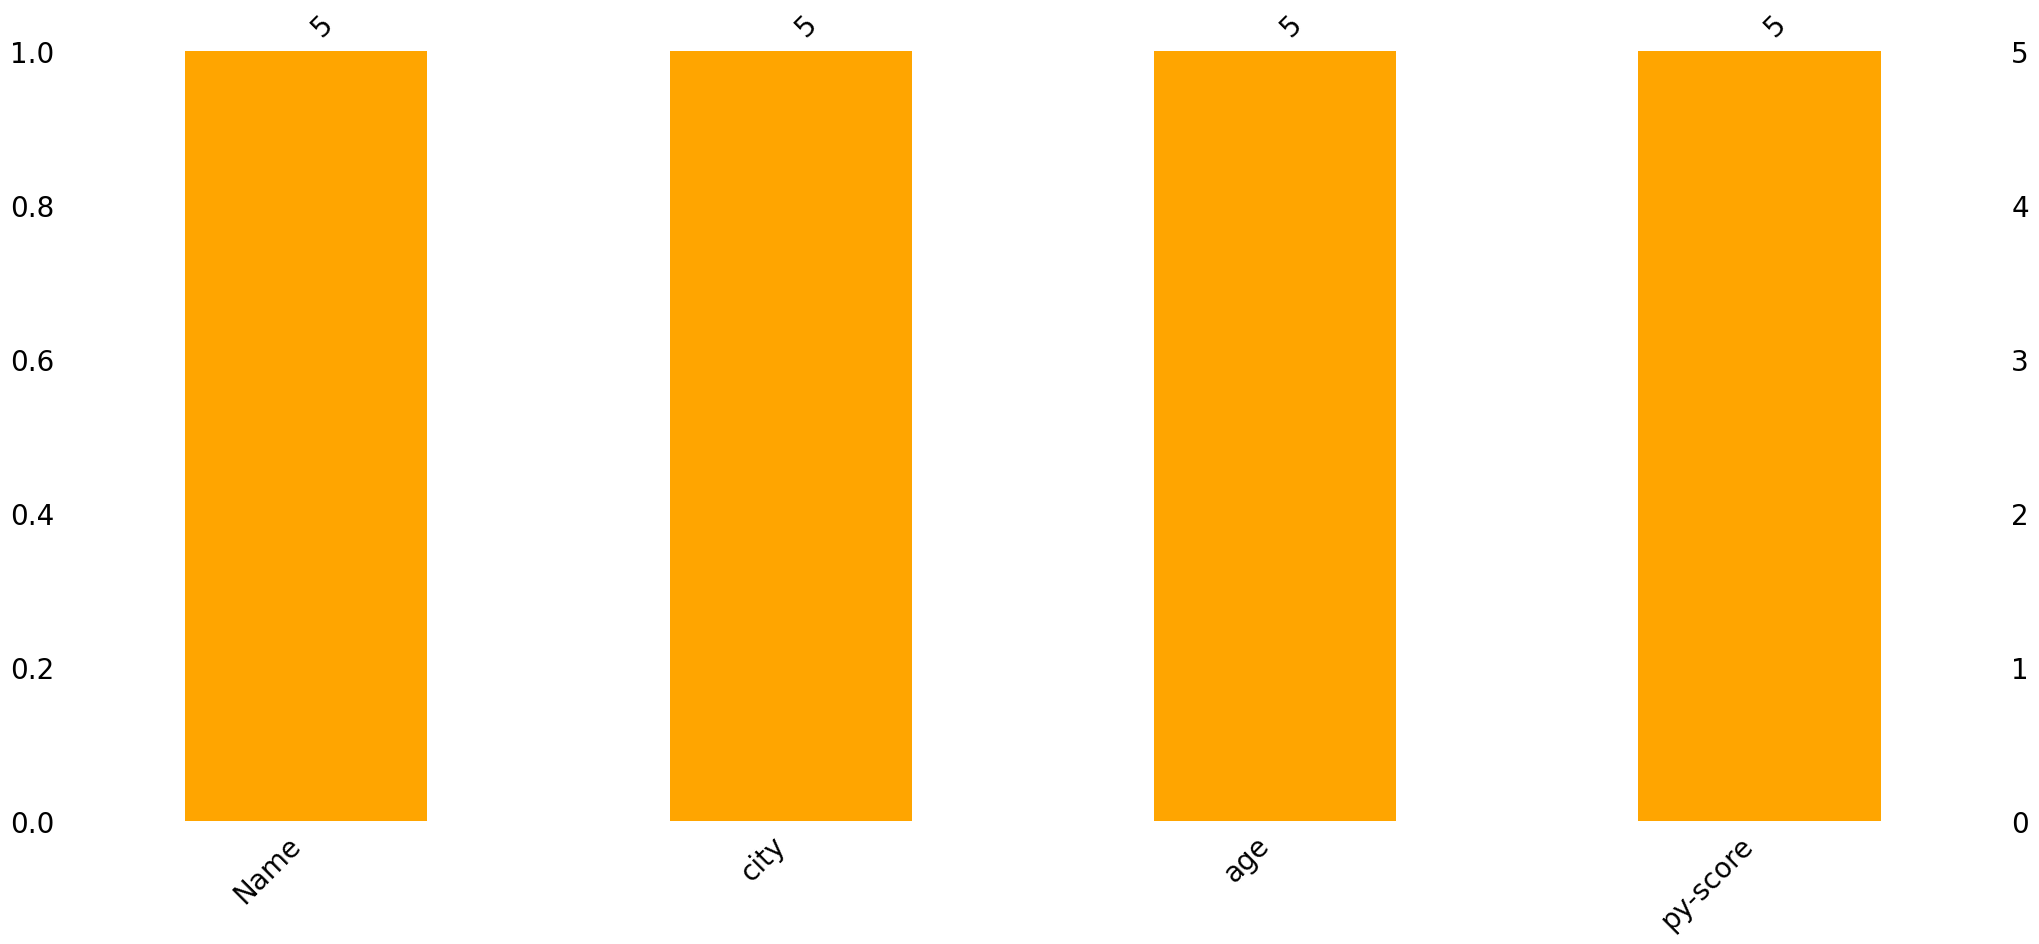

In [10]:
# Checking for null values in values
import missingno as msno
msno.bar(df2, color="orange", fontsize=20)

In [11]:
df2.duplicated().sum()

0

In [12]:
# Define the expected format for each column
format_mapping = {
    'Name': 'str',
    'City': 'str',
    'age': 'int',
    'py-score': 'int'
}

# Iterate over the columns
for column in df2.columns:
    if column in format_mapping:
        expected_format = format_mapping[column]
        wrong_format = df2[column].astype(str) != expected_format
        
        if wrong_format.any():
            print(f"Rows with wrong format in '{column}' column:")
            wrong_format_rows = df2[wrong_format]
            print(wrong_format_rows)
            
            # Substitute the wrong format values with the correct format
            df2.loc[wrong_format, column] = expected_format
# Display the modified DataFrame
print("Modified DataFrame:")
print(df2)

Rows with wrong format in 'Name' column:
     Name     city age py-score
0    Emma  Kampala  23       90
1  Wilber    Mbale  26       75
2   Robin     Gulu  25     mine
4    Yeko   Tororo  20       94
6   Jesca  Mbarara  21       84
Rows with wrong format in 'age' column:
  Name     city age py-score
0  str  Kampala  23       90
1  str    Mbale  26       75
2  str     Gulu  25     mine
4  str   Tororo  20       94
6  str  Mbarara  21       84
Rows with wrong format in 'py-score' column:
  Name     city  age py-score
0  str  Kampala  int       90
1  str    Mbale  int       75
2  str     Gulu  int     mine
4  str   Tororo  int       94
6  str  Mbarara  int       84
Modified DataFrame:
  Name     city  age py-score
0  str  Kampala  int      int
1  str    Mbale  int      int
2  str     Gulu  int      int
4  str   Tororo  int      int
6  str  Mbarara  int      int


In [13]:
df2['py-score'] = pd.to_numeric(df2['py-score'], errors='coerce')     # Convert 'Score' column to numeric, coercing invalid values to NaN
df2.dropna(inplace=True)     # Remove rows with invalid values
df2.drop_duplicates(inplace=True)     # Remove duplicate rows

,Name,city,age,py-score


In [14]:
# Perform correlation analysis
correlation = df2['py-score'].corr(df2['Name'])
print("Correlation between Name and py-score:", correlation)

Correlation between Name and py-score: nan
